In [27]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn  as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Data Cleaning

In [28]:
df = pd.read_csv('TrainOnMe.csv')
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1001 non-null   object 
 1   y           1001 non-null   object 
 2   x1          1001 non-null   object 
 3   x2          1000 non-null   float64
 4   x3          1000 non-null   float64
 5   x4          999 non-null    float64
 6   x5          1000 non-null   float64
 7   x6          1000 non-null   float64
 8   x7          999 non-null    object 
 9   x8          1000 non-null   float64
 10  x9          1000 non-null   float64
 11  x10         1000 non-null   float64
 12  x11         1000 non-null   float64
 13  x12         1000 non-null   object 
 14  x13         1000 non-null   float64
dtypes: float64(10), object(5)
memory usage: 117.4+ KB


Unnamed: 0    0
y             0
x1            0
x2            1
x3            1
x4            2
x5            1
x6            1
x7            2
x8            1
x9            1
x10           1
x11           1
x12           1
x13           1
dtype: int64

In [29]:


# drop all the NA rows
df.dropna(subset=['x1'], inplace=True)
df.dropna(subset=['x2'], inplace=True)
df.dropna(subset=['x3'], inplace=True)
df.dropna(subset=['x4'], inplace=True)
df.dropna(subset=['x5'], inplace=True)
df.dropna(subset=['x6'], inplace=True)
df.dropna(subset=['x7'], inplace=True)
df.dropna(subset=['x8'], inplace=True)
df.dropna(subset=['x9'], inplace=True)
df.dropna(subset=['x10'], inplace=True)
df.dropna(subset=['x11'], inplace=True)
df.dropna(subset=['x12'], inplace=True)
df.dropna(subset=['x13'], inplace=True)

df.loc[df['x12'] == 'Ture', 'x12'] = 'True'
df.loc[df['x7'] == 'Polkagriss', 'x7'] = 'Polkagris'
df.loc[df['x7'] == 'Schottisgriss', 'x7'] = 'Schottisgris'


df['x1'] = df['x1'].astype("float")
df['x2'] = df['x2'].astype("float")
df['x3'] = df['x3'].astype("float")
df['x4'] = df['x4'].astype("float")
df['x5'] = df['x5'].astype("float")
df['x6'] = df['x6'].astype("float")
df['x8'] = df['x8'].astype("float")
df['x9'] = df['x9'].astype("float")
df['x10'] = df['x10'].astype("float")
df['x11'] = df['x11'].astype("float")
df['x13'] = df['x13'].astype("float")

# encode x12
df['x12'] = df['x12'].map({'False': False, 'True': True})

# encode x7
# Hambogris --- 1
# Polkagris --- 2
# Polskorgris --- 3
# Schottisgris --- 4
# Slängpolskorgris --- 5
# df.loc[df['x7'] == 'Hambogris', 'x7'] = 1.0
# df.loc[df['x7'] == 'Polkagris', 'x7'] = 2.0
# df.loc[df['x7'] == 'Polskorgris', 'x7'] = 3.0
# df.loc[df['x7'] == 'Schottisgris', 'x7'] = 4.0
# df.loc[df['x7'] == 'Slängpolskorgris', 'x7'] = 5.0

df = df.iloc[:,1:]
df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 1000
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       998 non-null    object 
 1   x1      998 non-null    float64
 2   x2      998 non-null    float64
 3   x3      998 non-null    float64
 4   x4      998 non-null    float64
 5   x5      998 non-null    float64
 6   x6      998 non-null    float64
 7   x7      998 non-null    object 
 8   x8      998 non-null    float64
 9   x9      998 non-null    float64
 10  x10     998 non-null    float64
 11  x11     998 non-null    float64
 12  x12     998 non-null    bool   
 13  x13     998 non-null    float64
dtypes: bool(1), float64(11), object(2)
memory usage: 110.1+ KB


In [30]:
def get_type(x):
    return type(x).__name__

In [31]:
pd.set_option('display.max_rows', None)

In [32]:
print(pd.concat([df['x7'], df['x7'].apply(get_type)], axis=1))

                    x7   x7
0     Slängpolskorgris  str
1            Hambogris  str
2            Hambogris  str
3     Slängpolskorgris  str
4     Slängpolskorgris  str
5         Schottisgris  str
6     Slängpolskorgris  str
7         Schottisgris  str
8     Slängpolskorgris  str
9     Slängpolskorgris  str
10           Polkagris  str
11           Polkagris  str
12        Schottisgris  str
13    Slängpolskorgris  str
14           Polkagris  str
15           Polkagris  str
16           Polkagris  str
17    Slängpolskorgris  str
18    Slängpolskorgris  str
19           Polkagris  str
20        Schottisgris  str
21        Schottisgris  str
22    Slängpolskorgris  str
23    Slängpolskorgris  str
24    Slängpolskorgris  str
25           Polkagris  str
26    Slängpolskorgris  str
27           Hambogris  str
28        Schottisgris  str
29    Slängpolskorgris  str
30        Schottisgris  str
31           Polkagris  str
32           Hambogris  str
33    Slängpolskorgris  str
34    Slängpolskorgr

In [33]:
df['x7'].value_counts()

Slängpolskorgris    359
Polkagris           318
Hambogris           165
Schottisgris        134
Polskorgris          22
Name: x7, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 1000
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       998 non-null    object 
 1   x1      998 non-null    float64
 2   x2      998 non-null    float64
 3   x3      998 non-null    float64
 4   x4      998 non-null    float64
 5   x5      998 non-null    float64
 6   x6      998 non-null    float64
 7   x7      998 non-null    object 
 8   x8      998 non-null    float64
 9   x9      998 non-null    float64
 10  x10     998 non-null    float64
 11  x11     998 non-null    float64
 12  x12     998 non-null    bool   
 13  x13     998 non-null    float64
dtypes: bool(1), float64(11), object(2)
memory usage: 110.1+ KB


In [35]:
df['y'].value_counts()

Boborg       420
Atsutobob    317
Jorgsuto     258
Bobborg        1
Jorggsuto      1
Atsutoob       1
Name: y, dtype: int64

In [36]:
df['y'] = df['y'].replace('Bobborg', 'Boborg')
df['y'] = df['y'].replace('Jorggsuto', 'Jorgsuto')
df['y'] = df['y'].replace('Atsutoob', 'Atsutobob')

In [37]:
data_backup = df


# Outlier

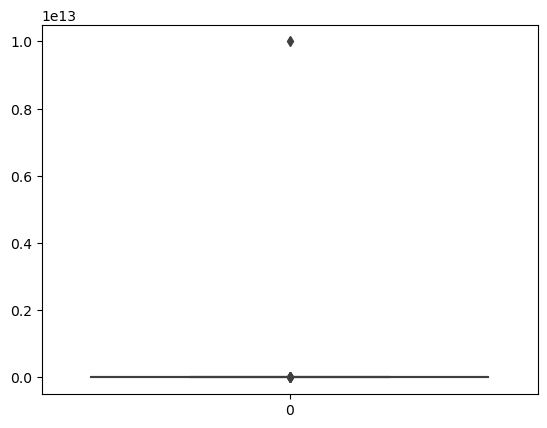

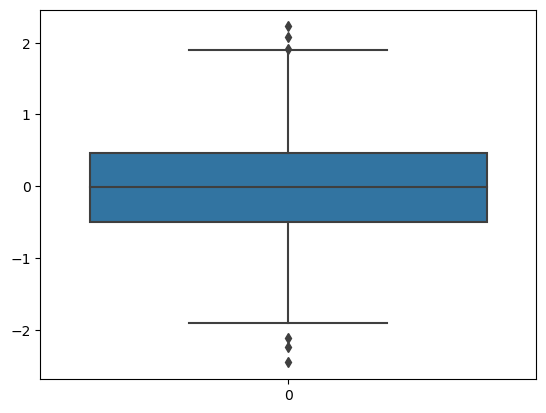

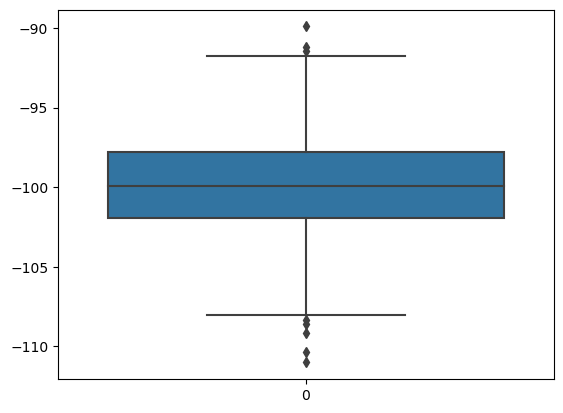

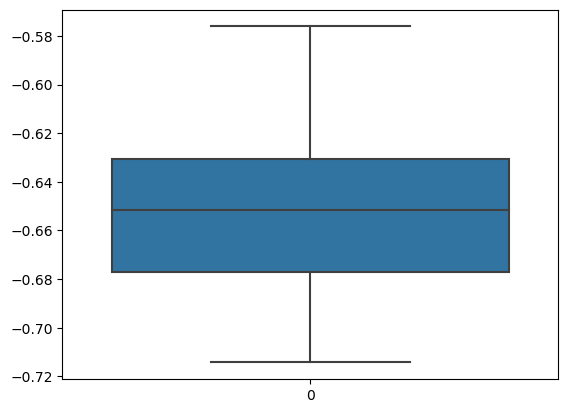

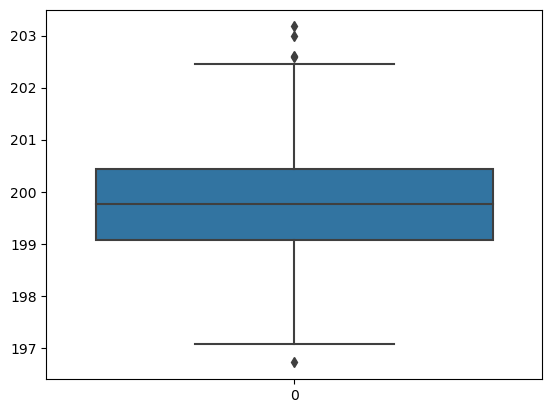

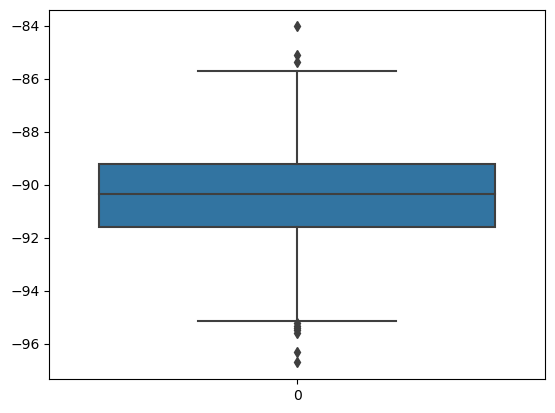

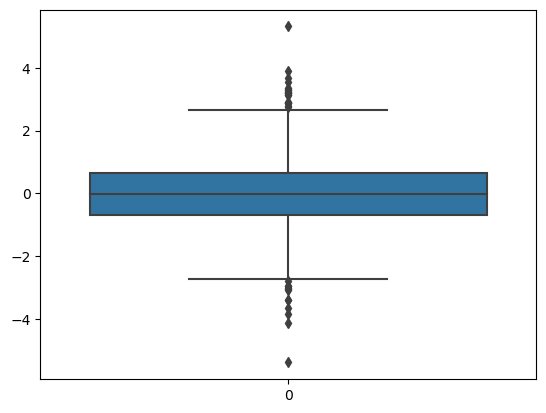

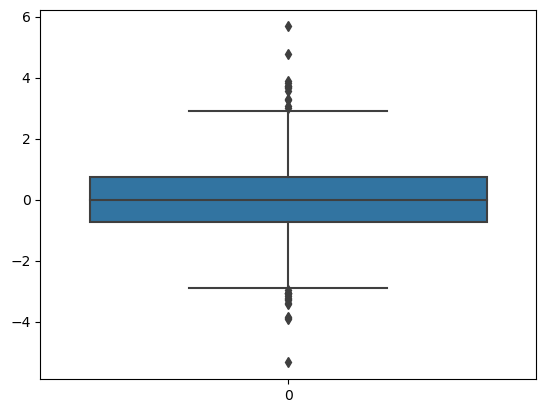

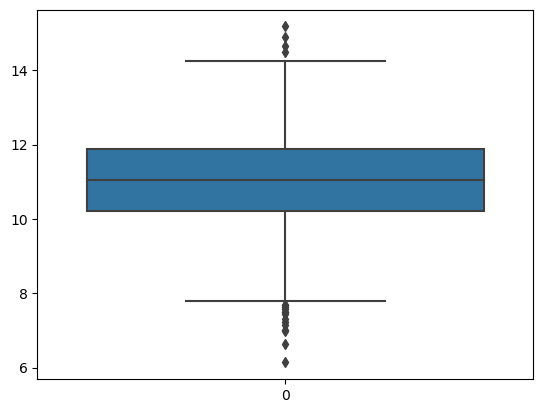

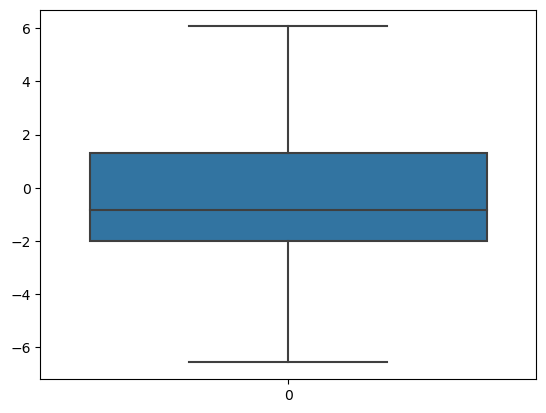

In [38]:
sns.boxplot(data=df['x1'])
plt.show()
sns.boxplot(data=df['x2'])
plt.show()
sns.boxplot(data=df['x3'])
plt.show()
sns.boxplot(data=df['x4'])
plt.show()
sns.boxplot(data=df['x5'])
plt.show()
sns.boxplot(data=df['x6'])
plt.show()
sns.boxplot(data=df['x8'])
plt.show()
sns.boxplot(data=df['x9'])
plt.show()
sns.boxplot(data=df['x10'])
plt.show()
sns.boxplot(data=df['x11'])
plt.show()

The most extreme one appears in x1. Keep the other points and only the outlier in x1 will be dropped.

In [39]:
q1 = df['x1'].quantile(0.25)
q3 = df['x1'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['x1'] >= lower_bound) & (df['x1'] <= upper_bound)]

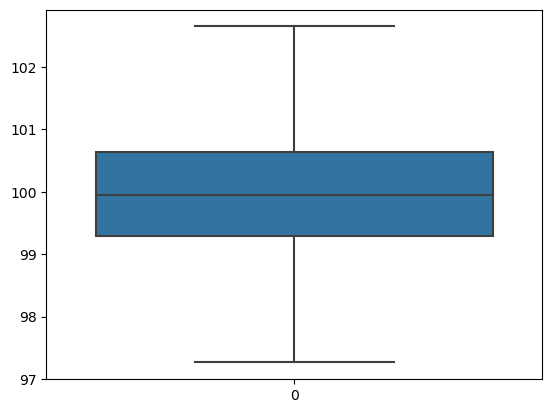

In [40]:
sns.boxplot(data=df['x1'])
plt.show()

Calculate Correlation

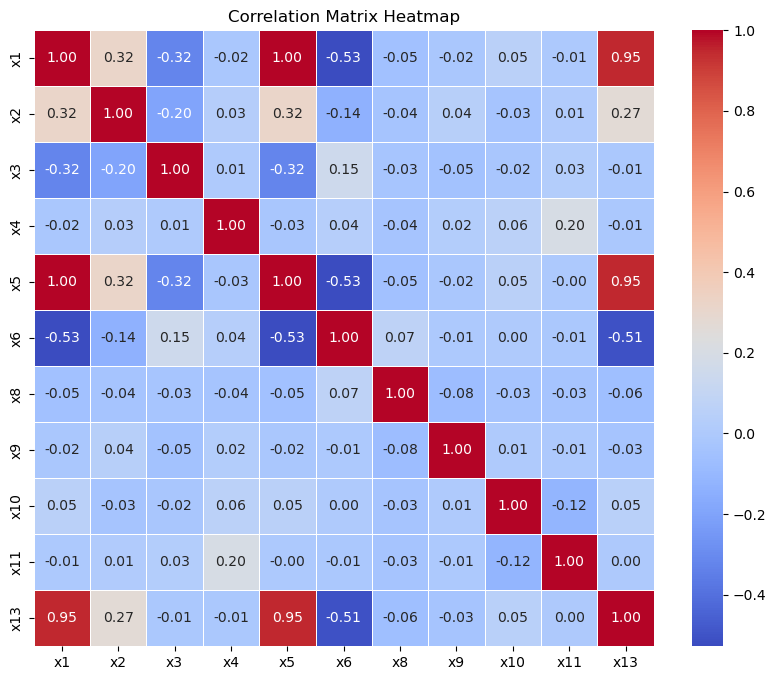

In [41]:
float_columns = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[float_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

x5 and x1; x5 and x13 are highly correlated

In [42]:
one_hot_encoded_x7 = pd.get_dummies(df['x7'], prefix='x7', dummy_na=False)
df = pd.concat([df.drop('x7', axis=1), one_hot_encoded_x7], axis=1)

In [43]:
x_train = df.drop(['y'], axis=1)
y_train = df['y']

Feature Scaling

In [44]:
scaler = StandardScaler()
df[['x1']] = scaler.fit_transform(df[['x1']])
df[['x3']] = scaler.fit_transform(df[['x3']])
df[['x4']] = scaler.fit_transform(df[['x4']])
df[['x5']] = scaler.fit_transform(df[['x5']])
df[['x6']] = scaler.fit_transform(df[['x6']])
df[['x10']] = scaler.fit_transform(df[['x10']])
df[['x13']] = scaler.fit_transform(df[['x13']])


# Process the Evaluation Data

In [45]:
dfe = pd.read_csv('EvaluateOnMe.csv')
dfe = dfe.iloc[:,1:]
one_hot_encoded_x7 = pd.get_dummies(dfe['x7'], prefix='x7', dummy_na=False)
dfe = pd.concat([dfe.drop('x7', axis=1), one_hot_encoded_x7], axis=1)

In [46]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x1                   10000 non-null  float64
 1   x2                   10000 non-null  float64
 2   x3                   10000 non-null  float64
 3   x4                   10000 non-null  float64
 4   x5                   10000 non-null  float64
 5   x6                   10000 non-null  float64
 6   x8                   10000 non-null  float64
 7   x9                   10000 non-null  float64
 8   x10                  10000 non-null  float64
 9   x11                  10000 non-null  float64
 10  x12                  10000 non-null  bool   
 11  x13                  10000 non-null  float64
 12  x7_Hambogris         10000 non-null  uint8  
 13  x7_Polkagris         10000 non-null  uint8  
 14  x7_Polskorgris       10000 non-null  uint8  
 15  x7_Schottisgris      10000 non-null  

In [47]:
scaler = StandardScaler()
dfe[['x1']] = scaler.fit_transform(dfe[['x1']])
dfe[['x3']] = scaler.fit_transform(dfe[['x3']])
dfe[['x4']] = scaler.fit_transform(dfe[['x4']])
dfe[['x5']] = scaler.fit_transform(dfe[['x5']])
dfe[['x6']] = scaler.fit_transform(dfe[['x6']])
dfe[['x10']] = scaler.fit_transform(dfe[['x10']])
dfe[['x13']] = scaler.fit_transform(dfe[['x13']])



In [48]:
X = df.drop('y', axis=1)
y = df['y']
X_pred = dfe

# Predict and Classify

In [49]:
rdm_value = 42
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.1, random_state=rdm_value)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=rdm_value),
    'SVM': SVC(),
    "SVM (linear)": SVC(kernel="linear"),
    "SVM (polynomial)": SVC(kernel="poly"),
    "Gradient Boosting": GradientBoostingClassifier(random_state=rdm_value),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(),
    'BaggingClassifier': BaggingClassifier(random_state=rdm_value),
    #'K-Nearest Neighbors': KNeighborsClassifier(),
    'MLP': MLPClassifier(),
    'Naive Bayes': GaussianNB()
}
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.4f}")

c:\Users\30201\.conda\envs\environ2233\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree: Accuracy = 0.6900
Random Forest: Accuracy = 0.8000
SVM: Accuracy = 0.7800
SVM (linear): Accuracy = 0.7000
SVM (polynomial): Accuracy = 0.7700
Gradient Boosting: Accuracy = 0.7900
AdaBoostClassifier: Accuracy = 0.7200
Logistic Regression: Accuracy = 0.6600
BaggingClassifier: Accuracy = 0.8200
MLP: Accuracy = 0.8000
Naive Bayes: Accuracy = 0.7500


c:\Users\30201\.conda\envs\environ2233\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Choose BaggingClassifier to train the data. The default base estimator is decision tree and it has the best performance.

In [50]:
bagging_model = BaggingClassifier(random_state=rdm_value)
bagging_model.fit(X, y)
y_pred = bagging_model.predict(X_pred)


In [51]:
with open('evaluation_prediction.txt', 'w') as f:
    for element in y_pred:
        f.write(element+'\n')

In [52]:
# mlp = MLPClassifier()
# mlp.fit(X,y)
# y_pred = mlp.predict(X_pred)
